## Esercizio
* scaricare i dati sugli edge da http://www.konect.cc/networks/dolphins/
* creare un grafo (capite voi se diretto o no) con gli edge dati -> undirected
* stampare numero di edge e di nodi
* aggiungere l'attributo age ai nodi con i dati presi dal file ./data/dolphins-nodes-age.csv
* salvare il file in formato .gexf
* fare il plot della distribuzione del grado della rete di delfini

In [5]:
edge_list = [
    tuple(map(int, line.split()))
    for line in list(open('../../data/dolphins/out.dolphins'))[1:]
]

edge_list

[(9, 4),
 (10, 6),
 (10, 7),
 (11, 1),
 (11, 3),
 (14, 6),
 (14, 7),
 (14, 10),
 (15, 1),
 (15, 4),
 (16, 1),
 (17, 15),
 (18, 2),
 (18, 7),
 (18, 10),
 (18, 14),
 (19, 16),
 (20, 2),
 (20, 8),
 (21, 9),
 (21, 17),
 (21, 19),
 (22, 19),
 (23, 18),
 (25, 15),
 (25, 16),
 (25, 19),
 (26, 18),
 (27, 2),
 (27, 26),
 (28, 2),
 (28, 8),
 (28, 18),
 (28, 26),
 (28, 27),
 (29, 2),
 (29, 9),
 (29, 21),
 (30, 11),
 (30, 19),
 (30, 22),
 (30, 25),
 (31, 8),
 (31, 20),
 (31, 29),
 (32, 18),
 (33, 10),
 (33, 14),
 (34, 13),
 (34, 15),
 (34, 17),
 (34, 22),
 (35, 15),
 (35, 34),
 (36, 30),
 (37, 2),
 (37, 21),
 (37, 24),
 (38, 9),
 (38, 15),
 (38, 17),
 (38, 22),
 (38, 34),
 (38, 35),
 (38, 37),
 (39, 15),
 (39, 17),
 (39, 21),
 (39, 34),
 (40, 37),
 (41, 1),
 (41, 8),
 (41, 15),
 (41, 16),
 (41, 34),
 (41, 37),
 (41, 38),
 (42, 2),
 (42, 10),
 (42, 14),
 (43, 1),
 (43, 3),
 (43, 11),
 (43, 31),
 (44, 15),
 (44, 30),
 (44, 34),
 (44, 38),
 (44, 39),
 (45, 3),
 (45, 21),
 (45, 35),
 (45, 39),
 (46, 9

In [6]:
import networkx as nx

In [7]:
G = nx.from_edgelist(edge_list)

In [10]:
f"n={G.order()}, m={G.size()}"

'n=62, m=159'

In [13]:
ages_map = {
    int(line.split(", ")[0]) : int(line.split(", ")[1])
    for line in list(open('../../data/dolphins/dolphins-nodes-age.csv'))[1:]
}

ages_map

{9: 15,
 4: 17,
 10: 20,
 6: 21,
 7: 13,
 11: 31,
 1: 34,
 3: 44,
 14: 30,
 15: 22,
 16: 29,
 17: 16,
 18: 37,
 2: 10,
 19: 17,
 20: 46,
 8: 21,
 21: 20,
 22: 34,
 23: 14,
 25: 44,
 26: 43,
 27: 21,
 28: 41,
 29: 23,
 30: 44,
 31: 35,
 32: 27,
 33: 44,
 34: 31,
 13: 44,
 35: 30,
 36: 15,
 37: 43,
 24: 21,
 38: 35,
 39: 22,
 40: 47,
 41: 31,
 42: 25,
 43: 15,
 44: 30,
 45: 19,
 46: 16,
 47: 17,
 48: 29,
 50: 19,
 51: 49,
 52: 28,
 5: 36,
 12: 31,
 53: 37,
 54: 26,
 55: 39,
 56: 14,
 57: 23,
 58: 12,
 49: 19,
 59: 32,
 60: 37,
 61: 35,
 62: 13}

In [14]:
nx.set_node_attributes(
    G,
    values=ages_map,
    name='age'
)

In [15]:
nx.write_gexf(
    G,
    path='../../data/dolphins/dolphins.gexf'
)

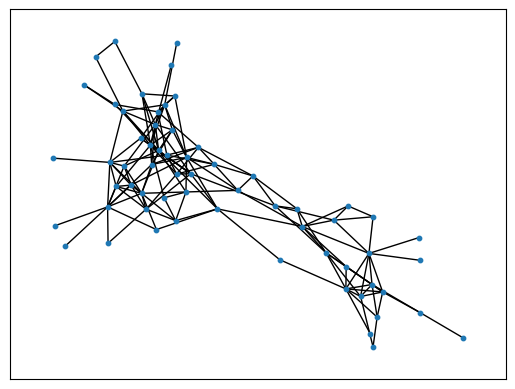

In [34]:
nx.draw_networkx(
    G,
    pos=nx.spring_layout(G),
    node_size=10,
    with_labels=False,
)

In [18]:
G.degree()

DegreeView({9: 6, 4: 3, 10: 7, 6: 4, 7: 6, 11: 5, 1: 6, 3: 4, 14: 8, 15: 12, 16: 7, 17: 6, 18: 9, 2: 8, 19: 7, 20: 4, 8: 5, 21: 9, 22: 6, 23: 1, 25: 6, 26: 3, 27: 3, 28: 5, 29: 5, 30: 9, 31: 5, 32: 1, 33: 3, 34: 10, 13: 1, 35: 5, 36: 1, 37: 7, 24: 3, 38: 11, 39: 8, 40: 2, 41: 8, 42: 5, 43: 6, 44: 7, 45: 4, 46: 11, 47: 2, 48: 6, 50: 2, 51: 7, 52: 10, 5: 1, 12: 1, 53: 4, 54: 2, 55: 7, 56: 2, 57: 2, 58: 9, 49: 1, 59: 1, 60: 5, 61: 1, 62: 3})

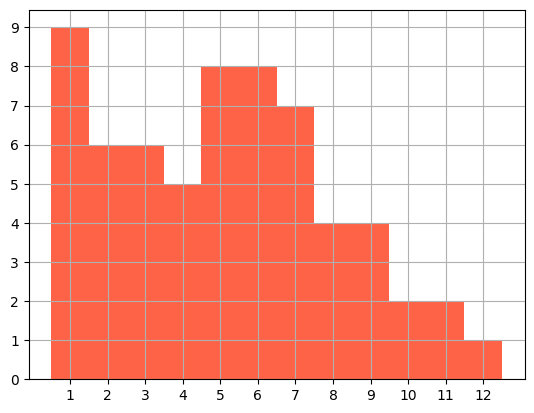

In [30]:
import numpy as np
import matplotlib.pyplot as plt

degrees = list(dict(G.degree()).values())

counts, bins = np.histogram(
    degrees,
    bins=np.arange(min(degrees),max(degrees)+2)
)

plt.hist(bins[:-1], bins, weights=counts, color = 'tomato')
plt.xticks([x+0.5 for x in range(1,max(degrees)+1)],range(1,max(degrees)+1))
plt.yticks(range(10))
plt.grid(True)
plt.show()


In [31]:
nx.density(G)

0.08408249603384453